In [3]:
import seaborn as sns
import pandas as pd

In [4]:
from stats import _munge
df = _munge("io/next-fig3.json.zip")

In [5]:
idx_fname = {
    0:  "i0126.png", 1:  "i0208.png", 2:  "i0076.png", 3:  "i0326.png",
    4:  "i0526.png", 5:  "i0322.png", 6:  "i0312.png", 7:  "i0036.png",
    8:  "i0414.png", 9:  "i0256.png", 10: "i0074.png", 11: "i0050.png",
    12: "i0470.png", 13: "i0022.png", 14: "i0430.png", 15: "i0254.png",
    16: "i0572.png", 17: "i0200.png", 18: "i0524.png", 19: "i0220.png",
    20: "i0438.png", 21: "i0454.png", 22: "i0112.png", 23: "i0494.png",
    24: "i0194.png", 25: "i0152.png", 26: "i0420.png", 27: "i0142.png",
    28: "i0114.png", 29: "i0184.png",
}
# fmt: on
spikes = {
    next_idx: int(fname.strip("i.png")) for next_idx, fname in idx_fname.items()
}

In [6]:
for k in ["head", "left", "right", "winner"]:
    df[f"{k}_spikes"] = df[k].apply(spikes.get)

In [7]:
list(sorted(df["head_spikes"].unique()))

[22,
 36,
 50,
 74,
 76,
 112,
 114,
 126,
 142,
 152,
 184,
 194,
 200,
 208,
 220,
 254,
 256,
 312,
 322,
 326,
 414,
 420,
 430,
 438,
 454,
 470,
 494,
 524,
 526,
 572]

In [8]:
import numpy as np
dl = np.abs(df["left_spikes"] - df["head_spikes"])
dr = np.abs(df["right_spikes"] - df["head_spikes"])

df["ratio"] = np.maximum(dl, dr) / (dl + dr)

left_wins = dl < dr
df["true_winner"] = df["right_spikes"]
df.loc[left_wins, "true_winner"] = df.loc[left_wins, "left_spikes"]
df["correct"] = df["true_winner"] == df["winner_spikes"]
accuracy = df["correct"].mean()
accuracy

0.796425370905108

<AxesSubplot:xlabel='ratio_binned', ylabel='response_time_binned'>

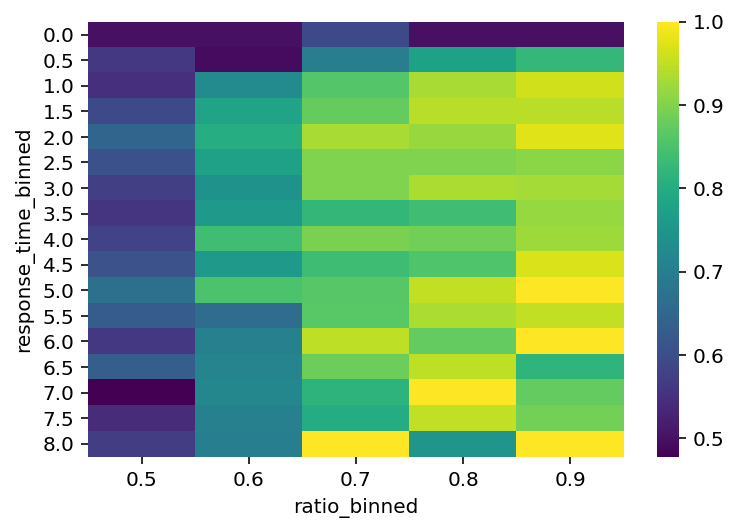

In [64]:
df["ratio_binned"] = np.round(1 * df["ratio"], 1) / 1
df["response_time_binned"] = np.round(2 * df["response_time"], 0) / 2
# print(df["ratio_binned"].unique())
# print(df["response_time_binned"].unique())
idx = (0 <= df["response_time"]) & (df["response_time"] <= 8)
idx &= (0.45 < df.ratio_binned) & (df.ratio_binned < 0.99)
show = df[idx]


s = show.pivot_table(
    columns="ratio_binned",
    values="correct",
    index="response_time_binned",
#     aggfunc=np.median,
)
sns.heatmap(data=s, cmap="viridis")

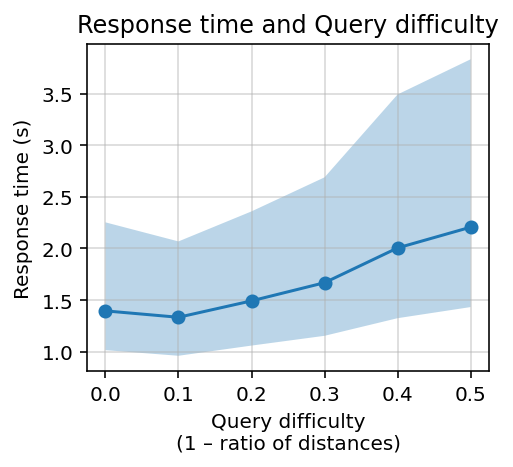

In [103]:
import matplotlib.pyplot as plt
w = 3
fig, ax = plt.subplots(figsize=(1.2 * w, w))
df["1-ratio_binned"] = 1 - df["ratio_binned"]
show = df.pivot_table(
    values="response_time",
    index="1-ratio_binned",
    aggfunc="median",
)
upper = df.pivot_table(
    values="response_time",
    index="1-ratio_binned",
    aggfunc=lambda x: np.percentile(x, 75)
)
lower = df.pivot_table(
    values="response_time",
    index="1-ratio_binned",
    aggfunc=lambda x: np.percentile(x, 25)
)
show.plot(style="o-", ax=ax)
ax.fill_between(lower.index, lower.values.flatten(), upper.values.flatten(), alpha=0.3)
ax.set_xlabel("Query difficulty\n(1 – ratio of distances)")
ax.set_ylabel("Response time (s)")
ax.grid(alpha=0.5)
ax.set_title("Response time and Query difficulty")
# ax.set_ylim(0, None)
ax.legend_.remove()
fig.savefig("/Users/scott/Downloads/response-time.png", dpi=300, bbox_inches="tight")
# ax.set_xlim(0.5, 1)

In [95]:
ax.fill_between?

Signature:
ax.fill_between(
    x,
    y1,
    y2=0,
    where=None,
    interpolate=False,
    step=None,
    *,
    data=None,
    **kwargs,
)
Docstring:
Fill the area between two horizontal curves.

The curves are defined by the points (*x*, *y1*) and (*x*,
*y2*).  This creates one or multiple polygons describing the filled
area.

You may exclude some horizontal sections from filling using *where*.

By default, the edges connect the given points directly.  Use *step*
if the filling should be a step function, i.e. constant in between
*x*.

Parameters
----------
x : array (length N)
    The x coordinates of the nodes defining the curves.

y1 : array (length N) or scalar
    The y coordinates of the nodes defining the first curve.

y2 : array (length N) or scalar, default: 0
    The y coordinates of the nodes defining the second curve.

where : array of bool (length N), optional
    Define *where* to exclude some horizontal regions from being filled.
    The filled regions are defined 

<AxesSubplot:xlabel='hours_from_start_binned', ylabel='ratio_binned'>

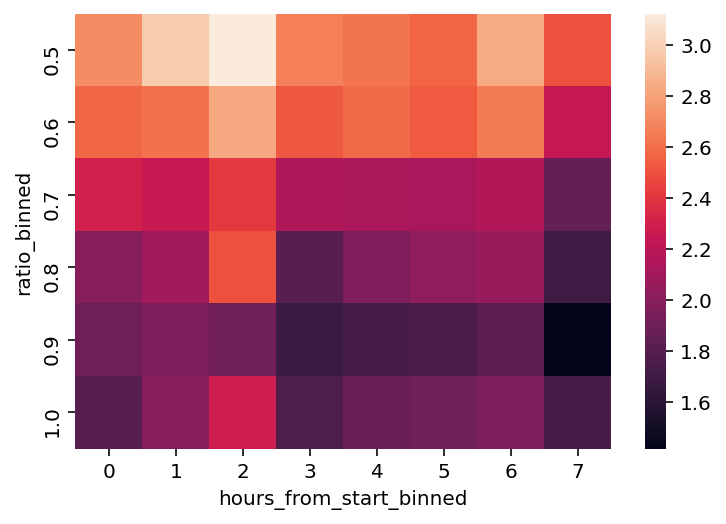

In [66]:
df["time_from_start"] = (df["timestamp"] - df["timestamp"].min())
df["hours_from_start"] = df["time_from_start"].dt.total_seconds() / (60 * 60)
idx = (0 <= df.response_time) & (df.response_time <= 10)

from datetime import timedelta

df["hours_from_start_binned"] = df["hours_from_start"].astype(int)

show = df[idx].pivot_table(
    columns="hours_from_start_binned",
    index="ratio_binned",
    values="response_time",
)
sns.heatmap(show)

# df[idx].rolling(window=800)["response_time"].median().plot()
# df[idx].plot(x="time_from_start", y="response_time", style="o", alpha=0.2)